In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygad
import seaborn as sns



In [21]:
path=r"data.csv"
data=pd.read_csv(path)
data.head(5)

data.keys()


Index(['Date', 'Number_of_Vehicles', 'Vehicle_Speed', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Chainage(km)',
       'Accident_Severity', 'No_of_accidents'],
      dtype='object')

In [7]:
#select ouput and input
x=data.iloc[:,1:7].values
y=data.iloc[:,8:].values
y

array([[2],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [9]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    abs_error = mae(data_outputs, predictions).numpy() + 0.00000001
    solution_fitness = 1.0 / abs_error

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

input_layer  = tensorflow.keras.layers.Input(6)
dense_layer1 = tensorflow.keras.layers.Dense(5, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="linear")(dense_layer1)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

weights_vector = pygad.kerasga.model_weights_as_vector(model=model)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# Data inputs
data_inputs =x

# Data outputs
data_outputs = y

num_generations = 100
num_parents_mating = 6
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)
ga_instance.run()





Generation = 1
Fitness    = 0.28231410708708415
Generation = 2
Fitness    = 0.28231410708708415
Generation = 3
Fitness    = 0.32574019064884824
Generation = 4
Fitness    = 0.32574019064884824
Generation = 5
Fitness    = 0.32574019064884824
Generation = 6
Fitness    = 0.32574019064884824
Generation = 7
Fitness    = 0.32574019064884824
Generation = 8
Fitness    = 0.34240107849654683
Generation = 9
Fitness    = 0.34240107849654683
Generation = 10
Fitness    = 0.3483723358082703
Generation = 11
Fitness    = 0.3483723358082703
Generation = 12
Fitness    = 0.3483723358082703
Generation = 13
Fitness    = 0.3483723358082703
Generation = 14
Fitness    = 0.3483723358082703
Generation = 15
Fitness    = 0.3483723358082703
Generation = 16
Fitness    = 0.3483723358082703
Generation = 17
Fitness    = 0.3483723358082703
Generation = 18
Fitness    = 0.4001758187496557
Generation = 19
Fitness    = 0.4001758187496557
Generation = 20
Fitness    = 0.4143080591422549
Generation = 21
Fitness    = 0.414308059

C:\ProgramData\Anaconda3\lib\site-packages\pygad\pygad.py:3142: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


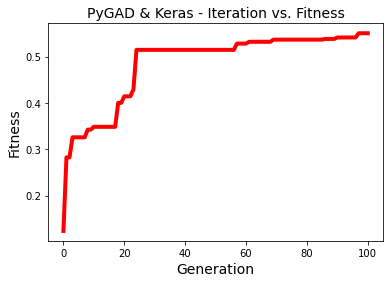

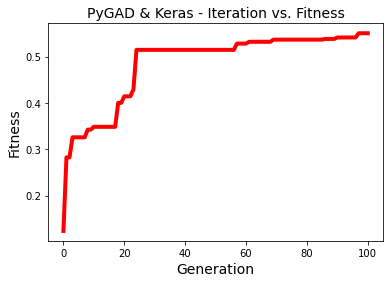

In [10]:
# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4,color='red',)


In [16]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs[[15]])
import math
pread=math.ceil(predictions)
print("Predicted value:-----", pread)
print("Actual_value:--------",data_outputs[[15]])

Fitness value of the best solution = 0.5504941326763498
Index of the best solution : 0
Predicted value:----- 2
Actual_value:-------- [[2]]


In [17]:
model.save("Genetic_model.h5")